In [1]:
import matplotlib.pyplot as plt
import math
import random
import time
import itertools
import urllib
import csv

# Todas as possíveis rotas

Vamos começar com o algoritmo força bruta.

In [2]:
def forca_bruta(cidades):
    "Gera todas as possíveis rotas e escolhe a menor delas."
    return rota_mais_curta(todas_as_rotas(cidades))

def rota_mais_curta(rotas): 
    "Escolhe a rota com menor tamanho."
    return min(rotas, key=tamanho_rota)

# TO DO: Tipos de dados: cidades, rotas, Funções: todas_as_rotas, tamanho_rota

**Detalhe**: no Python min(*conjunto, key=função*) significa achar o elemento que minimiza a função passada como chave.

## Representando uma rota

Uma rota pode ser representada por uma permutação das cidades a serem passadas. A ordem em que elas aparecem determina as distâncias a serem percorridas,pois duas cidades adjacentes representam um percurso.

In [3]:
todas_as_rotas = itertools.permutations

In [4]:
#Exemplo

cidades = [1, 2, 3, 4]
list(todas_as_rotas(cidades))

[(1, 2, 3, 4),
 (1, 2, 4, 3),
 (1, 3, 2, 4),
 (1, 3, 4, 2),
 (1, 4, 2, 3),
 (1, 4, 3, 2),
 (2, 1, 3, 4),
 (2, 1, 4, 3),
 (2, 3, 1, 4),
 (2, 3, 4, 1),
 (2, 4, 1, 3),
 (2, 4, 3, 1),
 (3, 1, 2, 4),
 (3, 1, 4, 2),
 (3, 2, 1, 4),
 (3, 2, 4, 1),
 (3, 4, 1, 2),
 (3, 4, 2, 1),
 (4, 1, 2, 3),
 (4, 1, 3, 2),
 (4, 2, 1, 3),
 (4, 2, 3, 1),
 (4, 3, 1, 2),
 (4, 3, 2, 1)]

In [6]:
def tamanho_rota(rota):
  "A distância total percorrida entre dois pares consecutivos em uma rota"
  return sum(distancia(rota[i-1], rota[i]) for i in range(len(rota)))

#TO DO: Função: distancia, Tipo de dados: cidades

**Detalhe**: Aqui usamos um truque específico do Python no qual distancia(rota[0], rota[-1]) se refere a distância entre o primeiro e o último elemento do vetor rota.

## Representando cidades

Cada cidade será representada como um ponto no espaço euclidiano (R^2) e a distância entre duas cidades é a distância euclidiana.

Neste caso temos um PCV simétrico, métrico, euclidiano.

## Computando distâncias

In [7]:
distancia = math.dist

In [8]:
#Exemplo
A = [3, 0]
B = [0, 4]
print(distancia(A,B))

5.0


## Conjunto de cidades aleatórias



In [9]:
[ [random.randrange(1000), random.randrange(1000)] for c in range(7) ]

[[957, 205],
 [914, 156],
 [216, 614],
 [902, 706],
 [997, 497],
 [72, 767],
 [125, 690]]

In [11]:
def Cidades (n, largura=900, altura=600, rseed=233):
  "Faz um conjunto com n cidades, com coordenadas aleatórias no máximo (largura x alutura)"
  random.seed(rseed)
  return [ [random.randrange(largura), random.randrange(altura)] for c in range(n) ]

In [12]:
forca_bruta(Cidades(10))

([698, 178],
 [710, 14],
 [85, 104],
 [78, 243],
 [275, 239],
 [537, 236],
 [564, 209],
 [620, 232],
 [819, 495],
 [767, 291])

## Desenhando a solução



In [13]:
def plotCidades(cidades):
  x = []
  y = []
  for i in range(len(cidades)):
    x.append(cidades[i][0])
    y.append(cidades[i][1])
  plt.scatter(x, y)

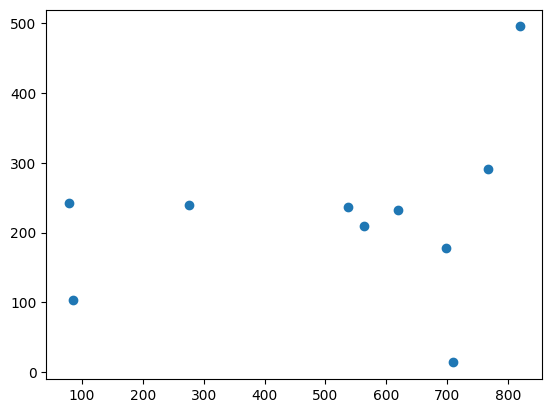

In [14]:
plotCidades(Cidades(10))

In [16]:
def plotRota(rota, completa=True):
  x = []
  y = []
  for i in range(len(rota)):
    x.append(rota[i][0])
    y.append(rota[i][1])

  if (completa):
    for i in range(len(rota)-1):
      for j in range(i+1,len(rota)):
        plt.plot([x[i], x[j]], [y[i], y[j]], color="LightGray", linewidth=1)

  for i in range(len(rota)):
    plt.plot([x[i], x[i-1]], [y[i], y[i-1]], color="Red", linewidth=2)

  plt.scatter(x, y, color="Blue", linewidth=3)

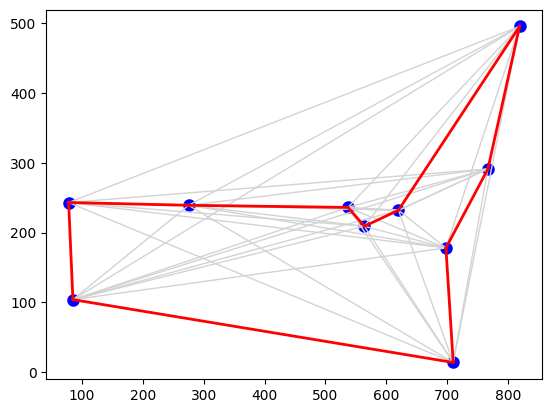

In [17]:
plotRota(forca_bruta(Cidades(10)))

## Complexidade de enumerar todas as rotas
Demora cerca de 2 segundos na minha máquina para resolver este problema de 10 cidades. Em geral, a função TSP considera (n-1)! passeios para um problema de n cidades, e cada passeio tem n cidades, então o tempo total necessário para n cidades deve ser aproximadamente proporcional a n!. Isso significa que o tempo cresce rapidamente com o número de cidades. Realmente rapidamente. Esta tabela mostra o tempo real para resolver um problema de 10 cidades e o tempo esperado para resolver problemas maiores:



|n	|tempo esperado
|:- |:-
|10	|10! rotas = 2 seg|
|11	|2 seg × 11! / 10! ≈ 22 seg|
|12	|2 seg × 12! / 10! ≈ 4 min|
|14	|2 seg × 14! / 10! ≈ 13 horas|
|16	|2 seg × 16! / 10! ≈ 200 dias|
|18	|2 seg × 18! / 10! ≈ 112 anos|
|25	|2 seg × 25! / 10! ≈ 270 bilhões de anos


Vamos precisar de uma forma melhor...

# Heurísticas construtivas



## Vizinho mais próximo

Uma heurística construtiva que surge como uma primeira ideia é a seguinte: a partir de uma nó inicial, escolher para qual nó ir em seguida simplesmente selecionando o trajeto mais curto.

Esta é uma estratégia gulosa, pois a cada instante em que uma decisão precisa ser tomada para a construção da rota, o critério de otimização é usado sem que haja posteriormente uma reconsideração sobre aquela decisão.


In [ ]:
def vizinho_mais_proximo(cidades):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[0]
    rota = [primeira]
    inexploradas = cidades
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota

def mais_proxima(c, cidades):
    "Encontre a cidade mais próxima da cidade c."
    return min(cidades, key=lambda x: distancia(c, x))

Detalhe: Em Python, assim como na teoria da computação, lambda (ou λ) é o símbolo para função, então "lambda x: distancia(c, x)" significa a função de x que calcula a distância de x para a cidade c.

Podemos comparar o rápido (porém inexado) algoritmo de vizinho mais próximo ao lento (porém exato) algoritmo de enumeração de todas as rotas para um conjunto pequeno:

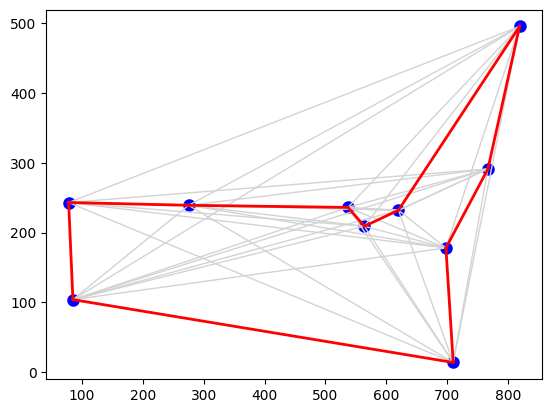

In [ ]:
plotRota(forca_bruta(Cidades(10)))

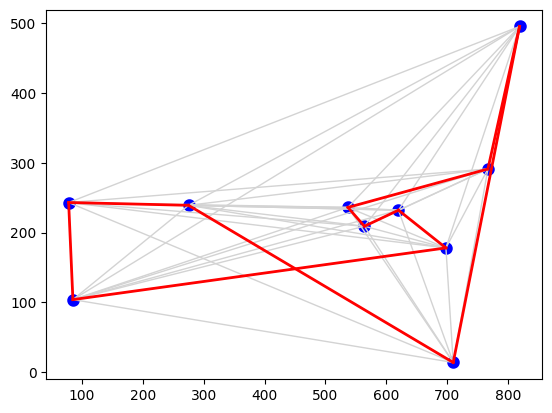

In [ ]:
plotRota(vizinho_mais_proximo(Cidades(10)))

Outra forma de compara é saber a qual a distância percentual da melhor solução obtida para a solução ótima dada pelo algoritmo que enumera todas as rotas. Essa distância é conhecida como *gap*.

In [ ]:
def gap(cidades): 
    "Gap percentual entre o algoritmo de vizinho mais próximo e o algoritmo de todas as rotas."
    opt = tamanho_rota(forca_bruta(cidades))
    cnd = tamanho_rota(vizinho_mais_proximo(cidades))
    return  (cnd-opt)/opt 

Para um resultado mais confiável podemos rodar um número maior de vezes.

In [ ]:
gaps = sorted(gap(Cidades(10, rseed=i)) for i in range(10))
[ print("{0:0.2f}".format(x)) for x in gaps ]
mean = sum(gaps)/len(gaps)
print("Media = ", "{0:0.2f}".format(mean))
print("Desvio Padrão = ", "{0:0.2f}".format( ( sum([((x - mean) ** 2) for x in gaps]) / len(gaps) ) **0.5 ) )

0.00
0.00
0.00
0.15
0.19
0.20
0.23
0.24
0.25
0.29
Media =  0.15
Desvio Padrão =  0.11


Sabemos que é pior, mas podemos agora dar respostas para uma entrada com centenas ou milhares de cidades. 

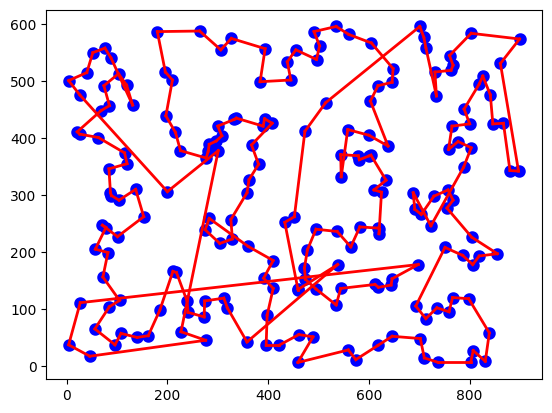

In [ ]:
plotRota(vizinho_mais_proximo(Cidades(200)),completa=False)

### Resultados podem variar dependendo do ponto de partida

A cidade inicial escolhida define toda a sequência de decisões que serão tomadas. Ao mudarmos a cidade inicial, é possível observar leves variações sobre a rota utilizada. Vamos então definir um algoritmo em que é possível selecionar o ponto de partida e avaliar como isso pode variar.

In [ ]:
def vmp(cidades, inicio):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[inicio]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota


Se quisermos obter o melhor valor possível com essa heurística podemos executá-la para todos as cidades como ponto inicial.

In [ ]:
def vmp_completa(cidades):
  return rota_mais_curta([ vmp(cidades, i) for i in range(len(cidades))])
    

Tamanho =  10799.126338818005


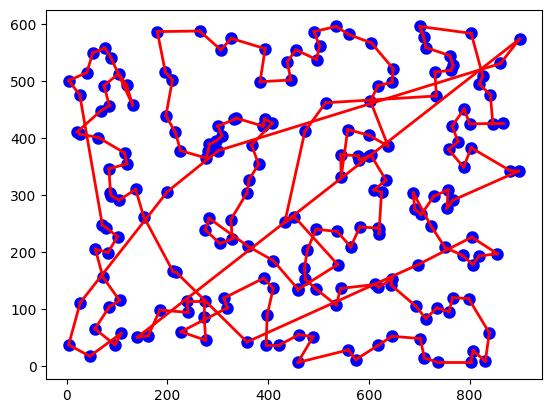

In [ ]:
rota = vmp(Cidades(200), 122)
print("Tamanho = ", tamanho_rota(rota) )
plotRota(rota,completa=False)

Tamanho =  10226.428015396954


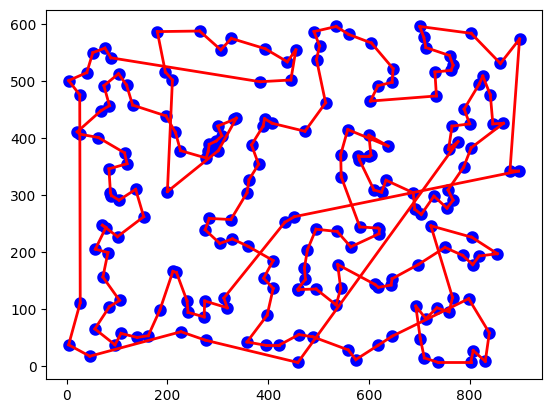

In [ ]:
rota = vmp(Cidades(200), 78)
print("Tamanho = ", tamanho_rota(rota) )
plotRota(rota,completa=False)

Tamanho =  9947.59311490794


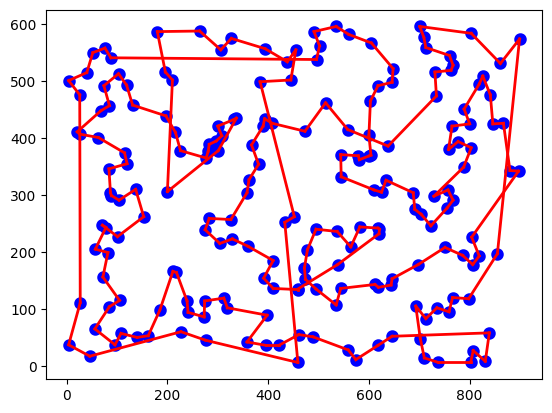

In [ ]:
rota = vmp(Cidades(200), 13)
print("Tamanho = ", tamanho_rota(rota) )
plotRota(rota,completa=False)

Tamanho =  9348.6722200493


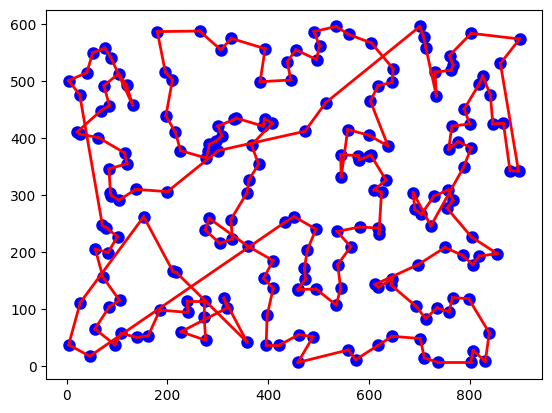

In [ ]:
rota = vmp_completa(Cidades(200))
print("Tamanho = ", tamanho_rota(rota) )
plotRota(rota,completa=False)

### Caso ruim: outliers



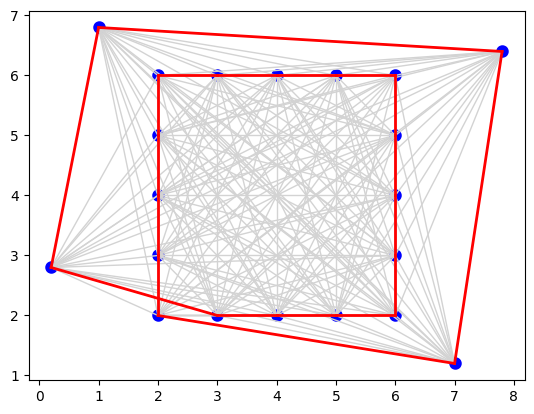

In [ ]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plotRota(vizinho_mais_proximo(outliers))


## Heurística gulosa para o PCV

In [ ]:
def guloso(cidades, verbose=False):
    """Percorre todas as arestas em ordem crescente e escolhe a primeira possível para fazer parte da solução"""
    arestas = ordena_arestas(cidades)
    terminais = [ [c] for c in range(len(cidades)) ] # A dict of {endpoint: segment}
    for [u,v] in arestas:
        if terminais[u] != [] and terminais[v] != [] and terminais[u] != terminais[v]:
            rota = unir(terminais, u, v, verbose)
            if len(rota) == len(cidades):
                rota = [ cidades[rota[i]] for i in range(len(cidades)) ]
                return rota
            
# TO DO: functions: ordena_arestas, unir

In [ ]:
def ordena_arestas(cidades):
  "Retorna todas as arestas em uma lista ordenada pelo tamanho."
  arestas = [ [u, v] for u in range(len(cidades)) for v in range(len(cidades)) if u < v]
  return sorted(arestas, key=lambda aresta : distancia(cidades[aresta[0]], cidades[aresta[1]]))

In [ ]:
def unir(terminais, u, v, verbose=False):
    "Une o segmento de u ao segmento de v, mantendo o dicionário de terminais"
    useg, vseg = terminais[u], terminais[v]
    if (verbose) : print(useg, "(+) ", vseg, " => ", end='')
    if useg[-1] is not u: useg.reverse()
    if vseg[0] is not v: vseg.reverse()
    useg.extend(vseg)
    if (verbose) : print(useg)
    terminais[u] = []
    terminais[v] = []
    terminais[useg[0]] = terminais[useg[-1]] = useg
    return useg

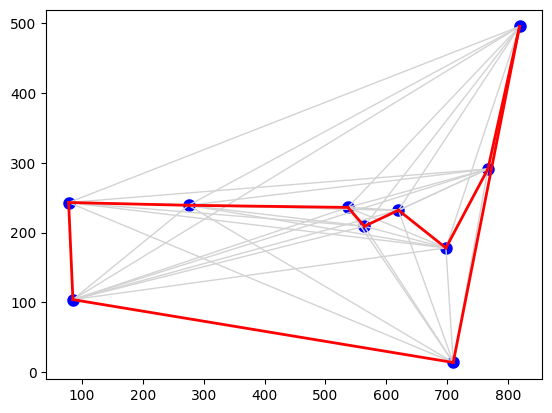

In [ ]:
plotRota(guloso(Cidades(10)))

[0] (+)  [1]  => [0, 1]
[0, 1] (+)  [15]  => [1, 0, 15]
[1, 0, 15] (+)  [2]  => [15, 0, 1, 2]
[15, 0, 1, 2] (+)  [3]  => [15, 0, 1, 2, 3]
[15, 0, 1, 2, 3] (+)  [4]  => [15, 0, 1, 2, 3, 4]
[15, 0, 1, 2, 3, 4] (+)  [5]  => [15, 0, 1, 2, 3, 4, 5]
[15, 0, 1, 2, 3, 4, 5] (+)  [6]  => [15, 0, 1, 2, 3, 4, 5, 6]
[15, 0, 1, 2, 3, 4, 5, 6] (+)  [7]  => [15, 0, 1, 2, 3, 4, 5, 6, 7]
[15, 0, 1, 2, 3, 4, 5, 6, 7] (+)  [8]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8] (+)  [9]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (+)  [10]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] (+)  [11]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] (+)  [12]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] (+)  [13]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] (+)  [14]  => [15, 0,

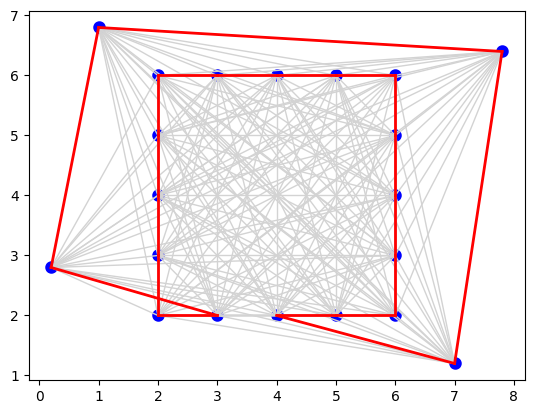

In [ ]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plotRota(guloso(outliers, verbose=True))

## Procedimento de lapidação

In [ ]:
def reverter(rota, i, j):
    "Se a reversão da rota [i:j] for mais curta então reverta." 
    u, v, x, y = rota[i-1], rota[i], rota[j-1], rota[j % len(rota)]
    if distancia(u, v) + distancia(x, y) > distancia(u, x) + distancia(v, y):
        rota[i:j] = reversed(rota[i:j])

In [ ]:
def alterar_rota(rota):
    "Procura todas as possíveis reversões de segmentos"
    segmentos = todos_segmentos(len(rota))
    while True:
      tamanho_atual = tamanho_rota(rota)
      for (u, v) in segmentos:
        reverter(rota, u, v)
      if tamanho_rota(rota) >= tamanho_atual: break
    return rota

def todos_segmentos(n):
    "Retorna todos os pares que formam segmentos de caminho numa rota de tamanho n."
    return [(u, u + t)
            for t in range(n, 1, -1)
            for u in range(n - t + 1)]

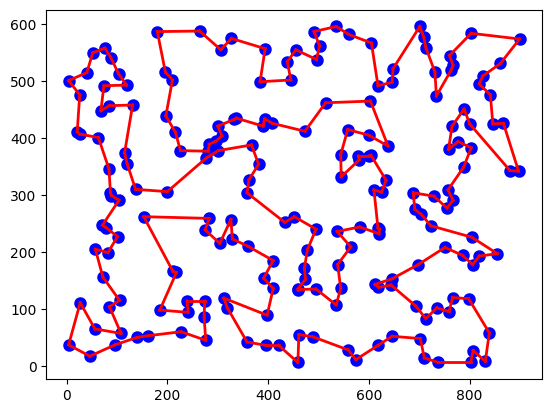

In [ ]:
plotRota(alterar_rota(vmp_completa(Cidades(200))), completa=False)

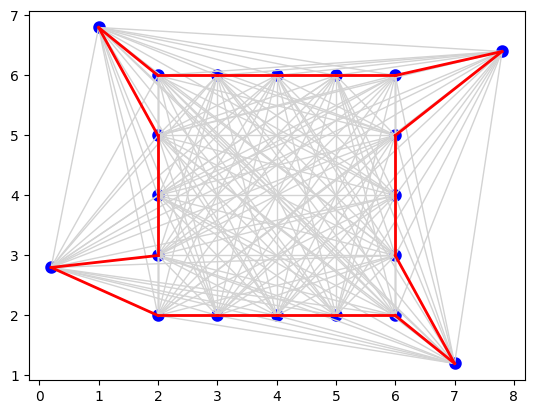

In [ ]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plotRota(alterar_rota(guloso(outliers)))